### Data Analysis Section 

In [224]:
# Importing the required libraries for visualization 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Visualization Prefrences.
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Visualization Prefrences.
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [226]:
# Data Retrieving
df = pd.read_csv("data\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


In [227]:
# Extract Descriptive Data.
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


1    165
0    138
Name: target, dtype: int64


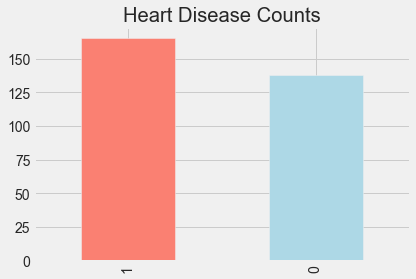

In [228]:
#Viewing the status of people in the data set : 
print(df.target.value_counts())
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"], title = 'Heart Disease Counts')

In [229]:
# Check for Null Values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [230]:
# Categorical and Numerical Continious Features 
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

print('==============================')
print(f"Categorical Features : {categorical_val}")
print(f"Continous Features : {continous_val}")


age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

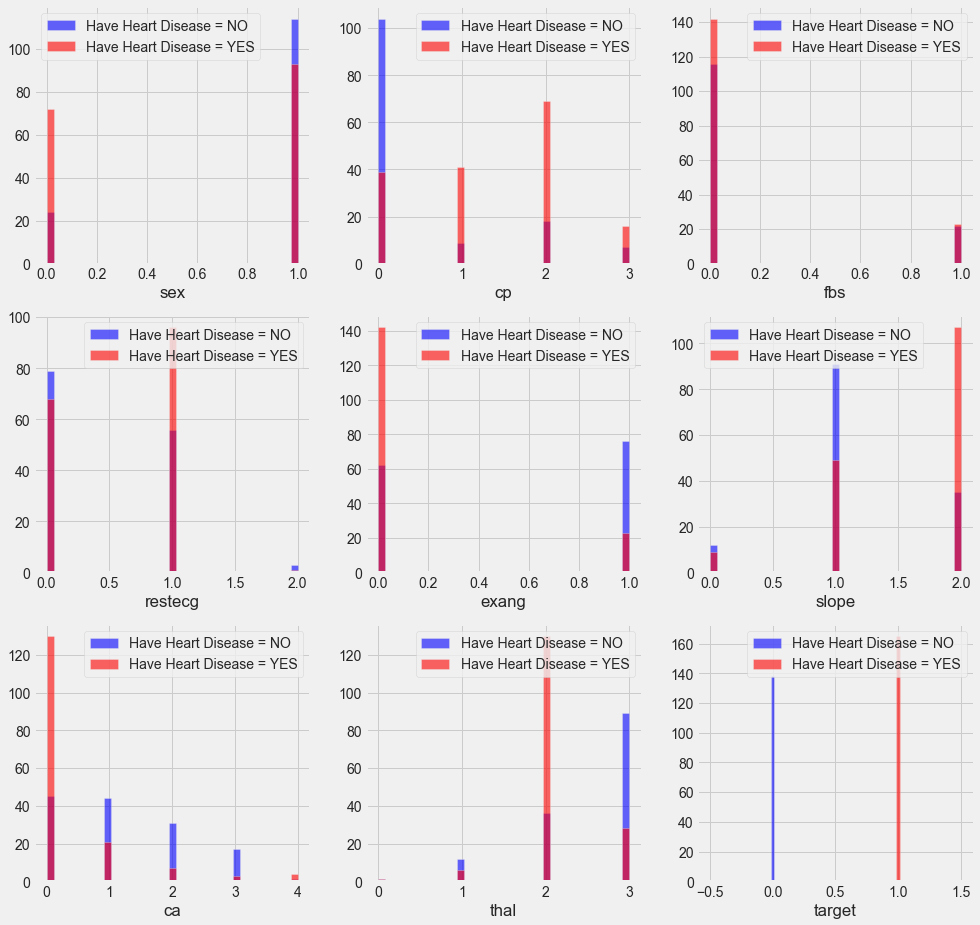

In [231]:
#Study of the relationship of categorical features and heart disease:

plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

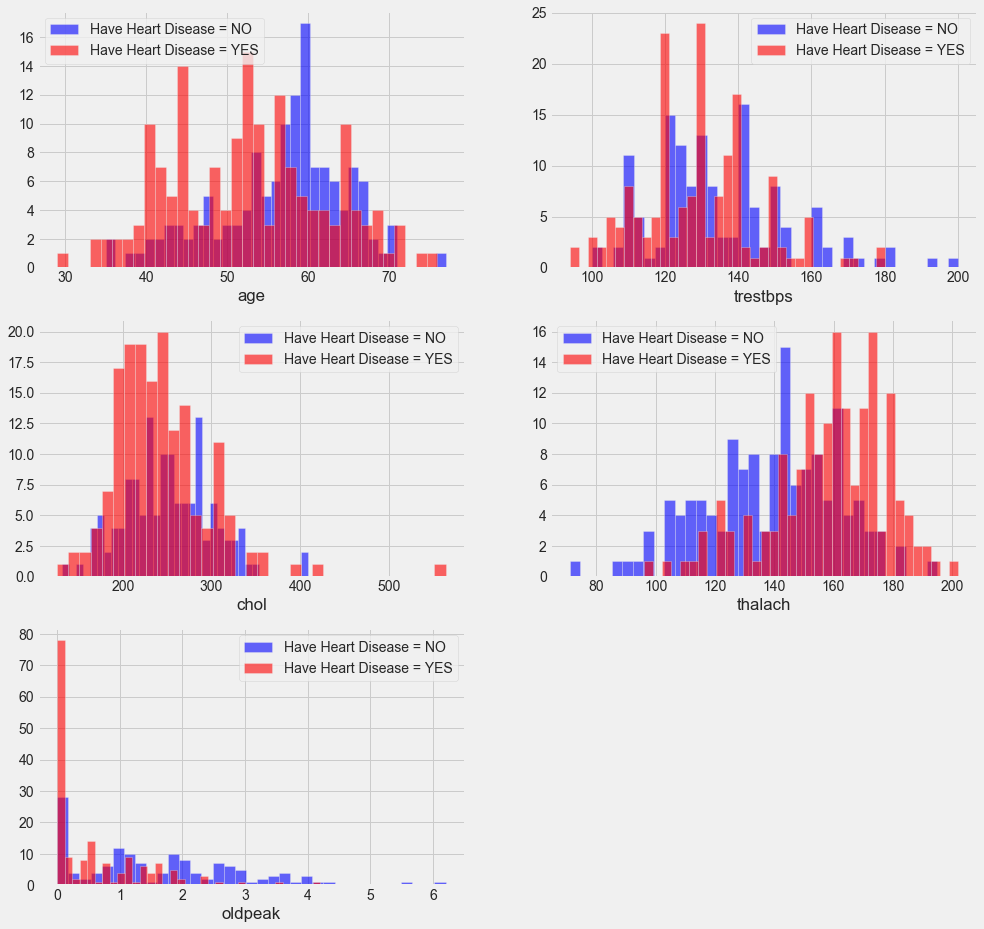

In [232]:
#Study of the relationship of continuous features and heart disease:

plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

(14.5, -0.5)

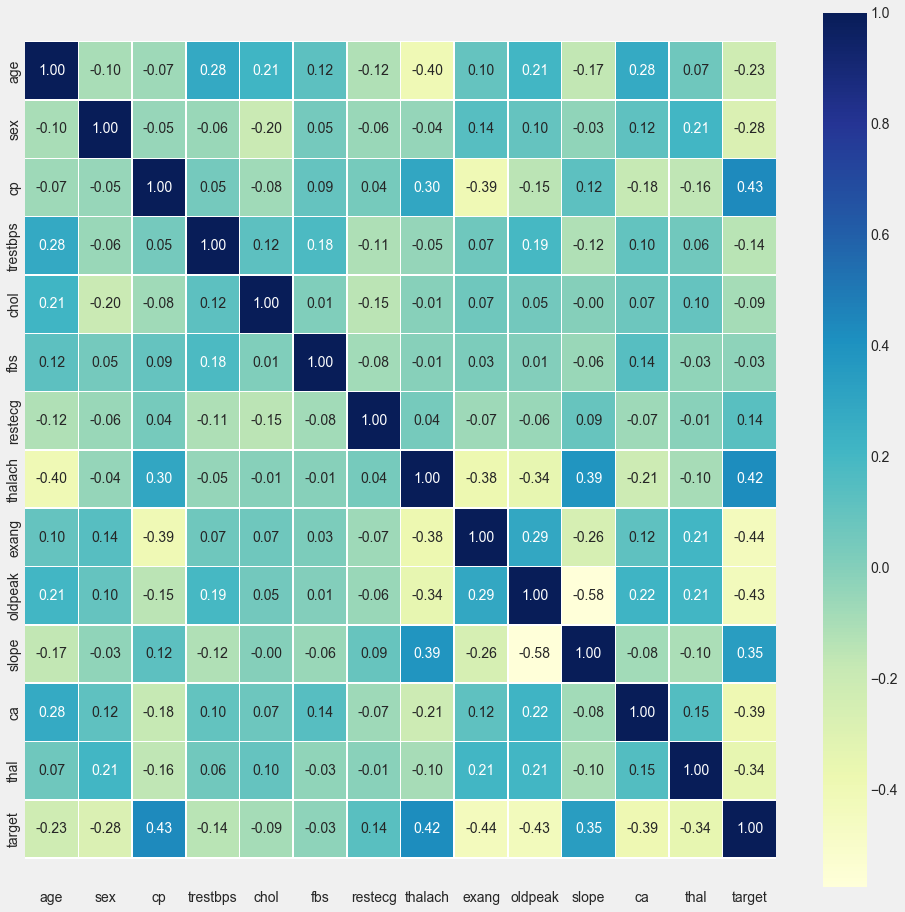

In [233]:
# Studying the correlations between features using Heat Map!
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

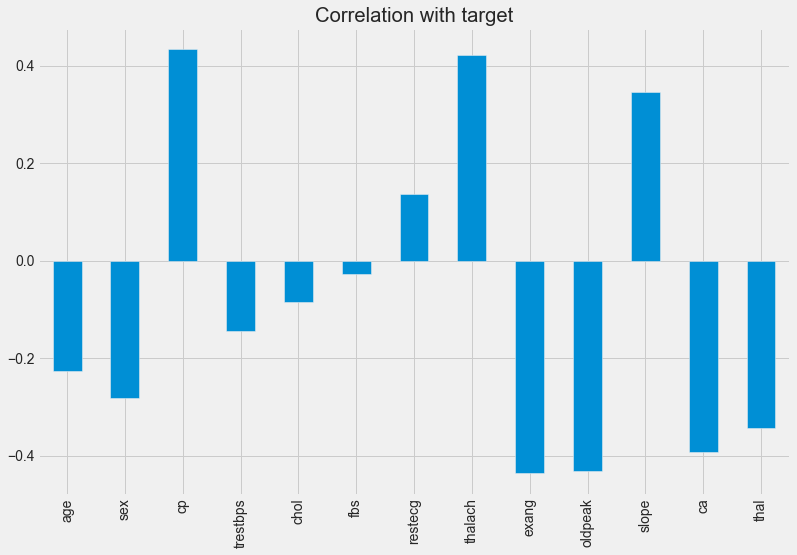

In [234]:

df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

In [235]:
categorical_val.remove('target')
dataset = pd.get_dummies(df, columns = categorical_val)

from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [236]:
dataset

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.95,0.76,-0.26,0.02,1.09,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.92,-0.09,0.07,1.63,2.12,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.47,-0.09,-0.82,0.98,0.31,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.18,-0.66,-0.20,1.24,-0.21,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.29,-0.66,2.08,0.58,-0.38,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.29,0.48,-0.10,-1.17,-0.72,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,-1.03,-1.23,0.34,-0.77,0.14,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,1.50,0.71,-1.03,-0.38,2.04,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,0.29,-0.09,-2.23,-1.52,0.14,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


## Machine Learning Section 

### 1- Logistic Regression Algorithm

In [289]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
feature_cols = [col_name for col_name in dataset.columns if col_name != 'target']

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(dataset[feature_cols], dataset.target))
# Create the dataframes
X_train = dataset.loc[train_idx, feature_cols]
y_train = dataset.loc[train_idx, 'target']

X_test  = dataset.loc[test_idx, feature_cols]
y_test  = dataset.loc[test_idx, 'target']

In [290]:
### BEGIN SOLUTION
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
y_pred_0 = lr.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, y_pred_0, output_dict=True))
clf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.78,0.80,0.79,0.79,0.79
recall,0.76,0.82,0.79,0.79,0.79
f1-score,0.77,0.81,0.79,0.79,0.79
support,41.00,50.00,0.79,91.00,91.00


In [291]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)
y_pred_1 = lr_l1.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, y_pred_1, output_dict=True))
clf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.81,0.78,0.79,0.79,0.79
recall,0.71,0.86,0.79,0.78,0.79
f1-score,0.75,0.82,0.79,0.79,0.79
support,41.00,50.00,0.79,91.00,91.00


In [292]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)
y_pred_2 = lr_l2.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, y_pred_2, output_dict=True))
clf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.79,0.81,0.80,0.80,0.80
recall,0.76,0.84,0.80,0.80,0.80
f1-score,0.77,0.82,0.80,0.80,0.80
support,41.00,50.00,0.80,91.00,91.00


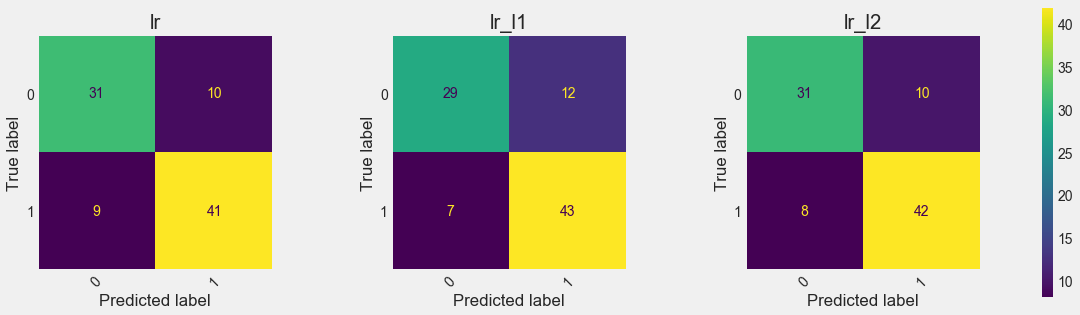

In [294]:
classifiers = {
    "lr": lr,
    "lr_l1": lr_l1,
    "lr_l2": lr_l2

}

f, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.grid(False)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()

f.colorbar(disp.im_, ax=axes)
plt.show()


### 2- KNN Algorithm

In [242]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, ConfusionMatrixDisplay

In [243]:
### BEGIN SOLUTION
max_k = 40
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

# Get minimum error id 
min_error_id = error_results['Error Rate'].idxmin()

# Get Best K 
error_results.loc[min_error_id]

K            25.00
Error Rate    0.16
Name: 24, dtype: float64

In [244]:
knn = KNeighborsClassifier(n_neighbors=25, weights='distance')
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

KNN_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
KNN_report

,0,1,accuracy,macro avg,weighted avg
precision,0.91,0.80,0.84,0.85,0.85
recall,0.71,0.94,0.84,0.82,0.84
f1-score,0.79,0.86,0.84,0.83,0.83
support,41.00,50.00,0.84,91.00,91.00


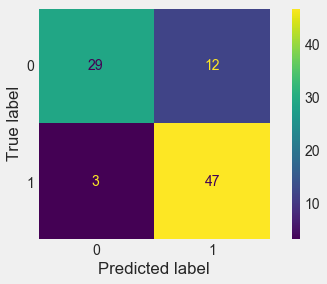

In [245]:
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.grid(False)
plt.show()

### 3- XGBoost Algorthim

In [246]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [284]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [5],
    "learning_rate": [0.05],
    "gamma": [0, 0.25, 1, 10],
    "reg_lambda": [0],
    "scale_pos_weight": [1, 3, 5, 7, 10],
    "subsample": [0.1,0.2, 0.3, 0.4, 0.5, 0.8],
    "colsample_bytree": [0.5,0.7],
}


# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit
_ = grid_cv.fit(X_train, y_train)

In [285]:
grid_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.25,
 'learning_rate': 0.05,
 'max_depth': 5,
 'reg_lambda': 0,
 'scale_pos_weight': 7,
 'subsample': 0.2}

In [287]:
final_xgb_cl = xgb.XGBClassifier(
    **grid_cv.best_params_,
    objective="binary:logistic",
)

_ = final_xgb_cl.fit(X_train, y_train)

y_pred = final_xgb_cl.predict(X_test)

xgb_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
xgb_report

,0,1,accuracy,macro avg,weighted avg
precision,0.90,0.76,0.80,0.83,0.82
recall,0.63,0.94,0.80,0.79,0.80
f1-score,0.74,0.84,0.80,0.79,0.80
support,41.00,50.00,0.80,91.00,91.00


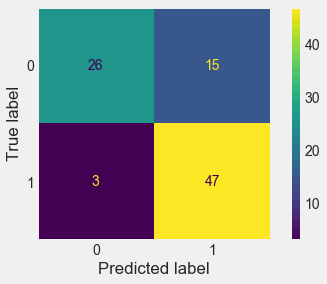

In [288]:
cm = confusion_matrix(y_test, y_pred, labels=final_xgb_cl.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_xgb_cl.classes_)
disp.plot()
plt.grid(False)
plt.show()

### 4- SVC Algorthim

In [252]:
from sklearn.svm import SVC

kwargs = {'kernel': 'rbf'}
svc = SVC(**kwargs)

SVC_cl = svc.fit(X_train, y_train)
y_pred = SVC_cl.predict(X_test)
SVC_cl_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
SVC_cl_report

,0,1,accuracy,macro avg,weighted avg
precision,0.79,0.81,0.80,0.80,0.80
recall,0.76,0.84,0.80,0.80,0.80
f1-score,0.77,0.82,0.80,0.80,0.80
support,41.00,50.00,0.80,91.00,91.00


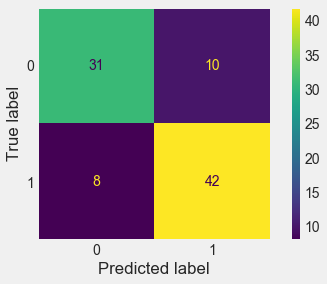

In [253]:
cm = confusion_matrix(y_test, y_pred, labels=SVC_cl.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=SVC_cl.classes_)
disp.plot()
plt.grid(False)
plt.show()